In [1]:
import sys

sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
from scripts.neuralnetwork.led import LED

/home/daan/.anaconda3/envs/pacs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Indicate the path of the dataset
path_data = "../../dataset/VDP_testset/VDP_testset_0.npz"

# Indicate the name of the pre-trained autoencoder and RNN
ae_name = "VDP_ae_identity"
rnn_name = "VDP_rnn"

# Indicate the desired length of the prediction
length_prediction = 180

# Instantiate the LED object
led = LED(
    autoencoder_name=ae_name, rnn_name=rnn_name, length_prediction=length_prediction
)

In [3]:
# Upload the data
led.get_data(path_data, compressed_name="data")

In [4]:
# Run the LED
led.run(identity=True)

In [5]:
# Compute the error
err = led.compute_error()

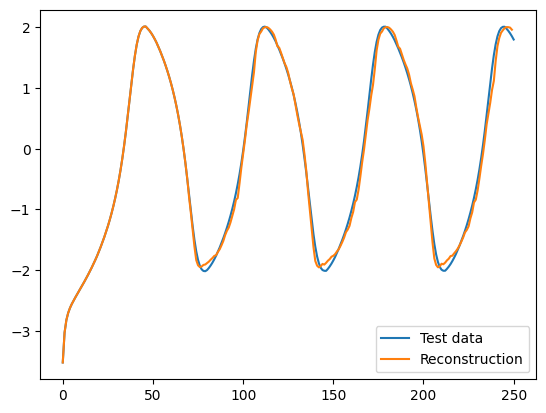

In [7]:
# Plot the real data vs the predicted one

plt.plot(np.arange(0, np.shape(led.data)[0]), led.data[:, 0])
plt.plot(np.arange(0, np.shape(led.forecast)[0]), led.forecast[:, 0])
plt.legend(["Test data", "Reconstruction"])
plt.show()